In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import nltk

*** Natural language toolkit download

In [2]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karthikeya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

*** Loading the dataset

In [3]:
df = pd.read_csv('sms_spam.csv')

In [4]:
df.shape

(5574, 2)

In [5]:
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.tail()

,type,text
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
type    5574 non-null object
text    5574 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


*** Feature engineering for spam and ham emails

In [8]:
df.type.replace('spam', 1, inplace=True)
df.type.replace('ham', 0, inplace=True)

*** Print first sms

In [9]:
df.iloc[0,1]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

#### Text processing and cleaning

In [10]:
N = 5574
corpus = []
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#PorterStemmer reduces all words to its base form

In [11]:
stopset = set(stopwords.words('english'))
stopset
#stopwords are like fillers in sentence formation. They do not hold any meaning in text mining and hence removed.

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [12]:
ps = PorterStemmer()

for i in range(0, 5574):
    sms = re.sub('r[^a-zA-Z]', ' ', df['text'].astype(str)[i]) #Replace all spl chars with space, except alphabets from each row
    sms = sms.lower() #convert to lower case
    sms = sms.split() # split sentence into words
    sms = [ps.stem(x) for x in sms 
          if not x in stopset] #Stem all words which are not stop words.
    sms = ' '.join(sms)
    corpus.append(sms)
    
# Compare sms before and after text mining    
print(corpus[0])
print(df.iloc[0,1])

go jurong point, crazy.. avail bugi n great world la e buffet... cine got amor wat...
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


*** We can use the cloud words to check the most used words in the sms

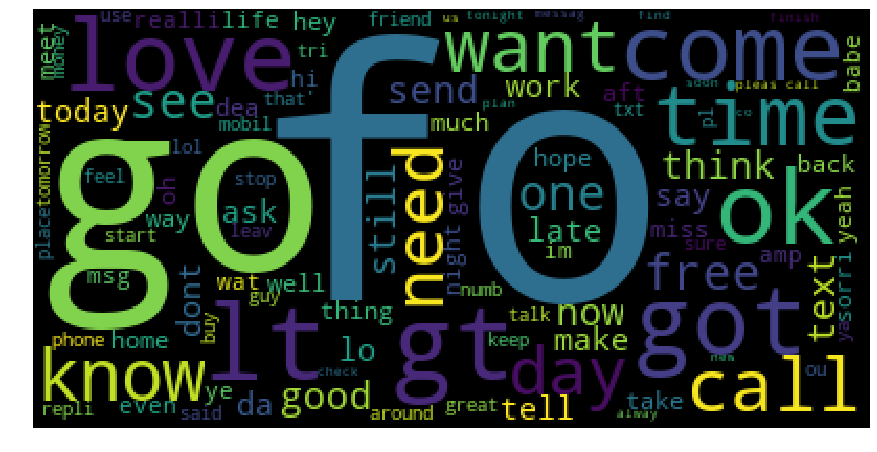

In [13]:
from wordcloud import WordCloud, STOPWORDS
word_string = ' '.join(corpus)
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', max_words = 100).generate(word_string)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### TF-IDF score

*** Its a NLP technique to find the weightage of each words. Most occuring words in document has less weightage.
TF = Term Frequency
IDF = Inverse Document Frequency
TFIdf score = TF(t) * IDF(t)

#### TF-IDF Vectorizer

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(use_idf=True, strip_accents='ascii')

#### Seperating features and labels

In [15]:
y = df.type
x = vect.fit_transform(corpus)

In [16]:
print(y.shape)
print(x.shape)

(5574,)
(5574, 8203)


*** Here 8203 are the no of words in the vector i.e created where each word has a tfid score to it.

*** Some micro analysis 

In [17]:
split_text = corpus[0].split()
print(split_text)

['go', 'jurong', 'point,', 'crazy..', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'cine', 'got', 'amor', 'wat...']


In [18]:
# Most occuring word in first sms
max(split_text)

'world'

In [19]:
# Total no. of words in first sms
len(split_text)

16

In [20]:
x[0]

<1x8203 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

*** Tf-Idf score of the first sms. i.e first row

In [21]:
x[0].data

array([0.1403105 , 0.34837693, 0.26268669, 0.31264222, 0.26979711,
       0.30553181, 0.19244987, 0.23354585, 0.22872499, 0.33256407,
       0.29431241, 0.16332786, 0.34837693, 0.19209371])

In [22]:
print(x)

  (0, 3397)	0.14031050147046717
  (0, 4152)	0.3483769275936142
  (0, 5639)	0.2626866912920459
  (0, 2251)	0.3126422238472987
  (0, 1294)	0.26979710569651444
  (0, 1713)	0.30553180944283004
  (0, 3480)	0.1924498701407592
  (0, 8039)	0.23354584728310468
  (0, 4270)	0.2287249886388596
  (0, 1711)	0.33256406927944426
  (0, 1989)	0.29431240792038577
  (0, 3442)	0.16332786182752834
  (0, 1068)	0.3483769275936142
  (0, 7834)	0.19209370960868205
  (1, 4270)	0.409446468709056
  (1, 5236)	0.27839543869558464
  (1, 4117)	0.49854918695995165
  (1, 7947)	0.4393962221086421
  (1, 5266)	0.5596688638412906
  (2, 3214)	0.12087088024975033
  (2, 2824)	0.37643455752075305
  (2, 7997)	0.19924799073823896
  (2, 2108)	0.20336949497413628
  (2, 7959)	0.15213595492000875
  (2, 2966)	0.3947783823138208
  :	:
  (5571, 3148)	0.16483382227199295
  (5571, 7208)	0.23673286533906
  (5571, 5328)	0.28902348399015204
  (5571, 6658)	0.3080430613681598
  (5571, 1091)	0.41236985742729787
  (5571, 4868)	0.38213444460804596

*** To get a particular word in the vector 

In [23]:
vect.get_feature_names()[7834]

'wat'

*** Most freq used words in the vector. i.e in all sms

In [24]:
max(vect.get_feature_names())

'zyada'

#### Train and test split of the data

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#### Building the naive bayes model

In [26]:
from sklearn import naive_bayes
clf = naive_bayes.MultinomialNB()

#### Fit the model

In [27]:
model = clf.fit(x_train, y_train)

#### Predict from model

In [28]:
y_pred = model.predict(x_test)

#### Evaluate model using metrics

In [29]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.roc_auc_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.9670014347202296
0.8795811518324608
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1203
           1       1.00      0.76      0.86       191

   micro avg       0.97      0.97      0.97      1394
   macro avg       0.98      0.88      0.92      1394
weighted avg       0.97      0.97      0.97      1394



*** Excellent model prediction using Naive Bayes model with good acc score and precision, recall values.